<a href="https://colab.research.google.com/github/cdodiya/Mental-Health-Prediction-using-Machine-Learning-Algorithms/blob/main/MentalHealthPredictionUsingMachineLearningAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library and Data Loading

In [2]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# from scipy import stats
# from scipy.stats import randint

# # prep
# from sklearn.model_selection import train_test_split
# from sklearn import preprocessing
# from sklearn.datasets import make_classification
# from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# # models
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# # Validation libraries
# from sklearn import metrics
# from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
# from sklearn.model_selection import cross_val_score

# #Neural Network
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import RandomizedSearchCV

# #Bagging
# from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
# from sklearn.neighbors import KNeighborsClassifier

# #Naive bayes
# from sklearn.naive_bayes import GaussianNB 

# #Stacking
# from mlxtend.classifier import StackingClassifier

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

#Stacking
from mlxtend.classifier import StackingClassifier

In [4]:
# from google.colab import files
# uploaded = files.upload()

In [5]:
train_df = pd.read_csv('survey.csv')
print('Size of Dataset',train_df.shape,'\n') #size of the dataset

print('Describing the dataset',train_df.describe(),'\n')#describing features of dataset
print(train_df.info())

Size of Dataset (1259, 27) 

Describing the dataset                 Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object

In [6]:
train_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


#Data Cleaning

In [7]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)#sorts the missing values coloums in descending order
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])# creates new data frame
missing_data.head(20)
print(missing_data)

train_df.isnull().sum()# gives total number of null values in each coloum
# print(percent) #for each column separate value 

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
seek_help                      0  0.000000
obs_consequence                0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
phys_health_consequence        0  0.000000
mental_health_consequence      0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
Timestamp                      0  0.000000
wellness_program               0  0.000000
Age                            0  0.000000
benefits                       0  0.000000
tech_company                   0  0.000000
remote_work                    0  0.000000
no_employees                   0  0.000000
treatment  

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [8]:
#dealing with missing data
train_df.drop(['comments'], axis= 1, inplace=True)
train_df.drop(['state'], axis= 1, inplace=True)
train_df.drop(['Timestamp'], axis= 1, inplace=True)

train_df.isnull().sum().max() #just checking that there's no missing data missing...
train_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


Cleaning NaN

In [9]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data type
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [10]:
#Clean 'Gender'
#finding the gender values input in the dataset which are unique
gender = train_df['Gender'].unique()
print(gender)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [11]:
# #Made gender groups
# male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
# trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
# female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]


# #simplifying dataset, keeping only 3 genders instead of various input for simplicfication of model
# for (row, col) in train_df.iterrows():

#     if str.lower(col.Gender) in male_str:
#         train_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

#     if str.lower(col.Gender) in female_str:
#         train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

#     if str.lower(col.Gender) in trans_str:
#         train_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

# #Get rid of anoynomus enrty
# stk_list = ['A little about you', 'p']
# train_df = train_df[~train_df['Gender'].isin(stk_list)]

# print(train_df['Gender'].unique())


# Standardizing Gender Entries
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man", "msle", "mail", "malr",
            "cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary", "nah", "all", "enby", "fluid",
             "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman",
             "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female_str = ["cis female", "f", "female", "woman", "femake", "female ", "cis-female/femme", "female (cis)", "femail"]

# Convert Gender column to lowercase for consistent comparisons
train_df['Gender'] = train_df['Gender'].str.lower()

# Mapping gender categories using vectorized replace()
train_df['Gender'] = train_df['Gender'].replace(male_str, 'male')
train_df['Gender'] = train_df['Gender'].replace(female_str, 'female')
train_df['Gender'] = train_df['Gender'].replace(trans_str, 'trans')

# Remove unwanted values
stk_list = ['a little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]

# Print unique values to verify
print(train_df['Gender'].unique())


['female' 'male' 'trans']


In [12]:
# #complete missing age with mean
# train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

# # Fill with media() values < 18 and > 120
# s = pd.Series(train_df['Age'])
# s[s<18] = train_df['Age'].median()
# train_df['Age'] = s
# s = pd.Series(train_df['Age'])
# s[s>120] = train_df['Age'].median()
# train_df['Age'] = s

# #Ranges of Age
# train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

# Fill missing Age values with median (without inplace=True)
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

# Ensure Age values are within a valid range (18 to 120)
train_df.loc[train_df['Age'] < 18, 'Age'] = train_df['Age'].median()
train_df.loc[train_df['Age'] > 120, 'Age'] = train_df['Age'].median()

# Create age groups
train_df['age_range'] = pd.cut(train_df['Age'], bins=[0, 20, 30, 65, 100], 
                               labels=["0-20", "21-30", "31-65", "66-100"], 
                               include_lowest=True)

# Print unique values to verify
print(train_df['age_range'].unique())


['31-65', '21-30', '0-20', '66-100']
Categories (4, object): ['0-20' < '21-30' < '31-65' < '66-100']


In [13]:
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


In [14]:
#There are only 0.20% of self work_interfere so let's change NaN to "Don't know
#Replace "NaN" string from defaultString

train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


#Encoding Data

In [15]:
#Encoding data
# labelling data
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_emp

In [16]:
#Get rid of 'Country'
train_df = train_df.drop(['Country'], axis= 1)
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


Testing there aren't any missing data

In [17]:
#missing data (same as we did in start)
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
obs_consequence                0      0.0
mental_vs_physical             0      0.0
phys_health_interview          0      0.0
mental_health_interview        0      0.0
supervisor                     0      0.0
coworkers                      0      0.0
phys_health_consequence        0      0.0
mental_health_consequence      0      0.0
leave                          0      0.0
anonymity                      0      0.0
seek_help                      0      0.0
wellness_program               0      0.0
care_options                   0      0.0
benefits                       0      0.0
tech_company                   0      0.0
remote_work                    0      0.0
no_employees                   0      0.0
work_interfere                 0      0.0
treatment                      0      0.0
family_history                 0      0.0
self_employed                  0  

Features Scaling: We're going to scale age, because it is extremely different from the other ones.

#Covariance Matrix. Variability comparison between categories of variables

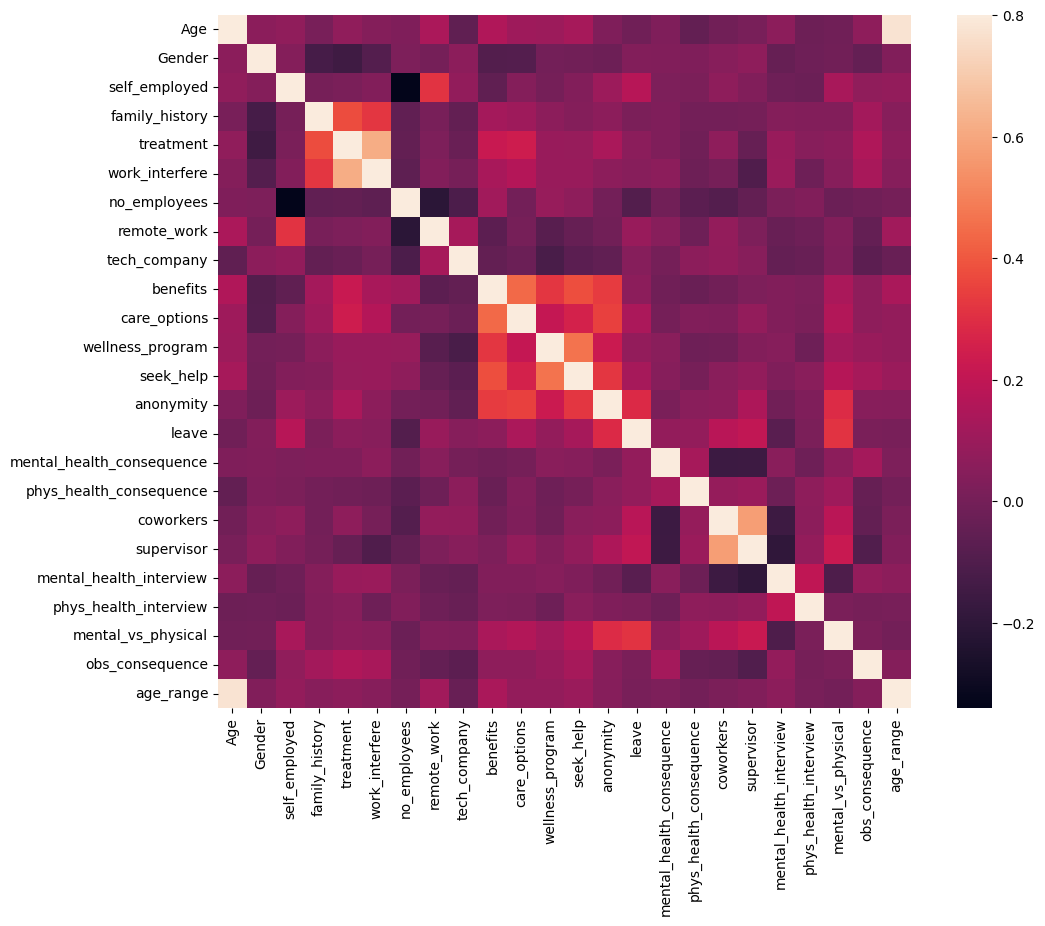

In [18]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

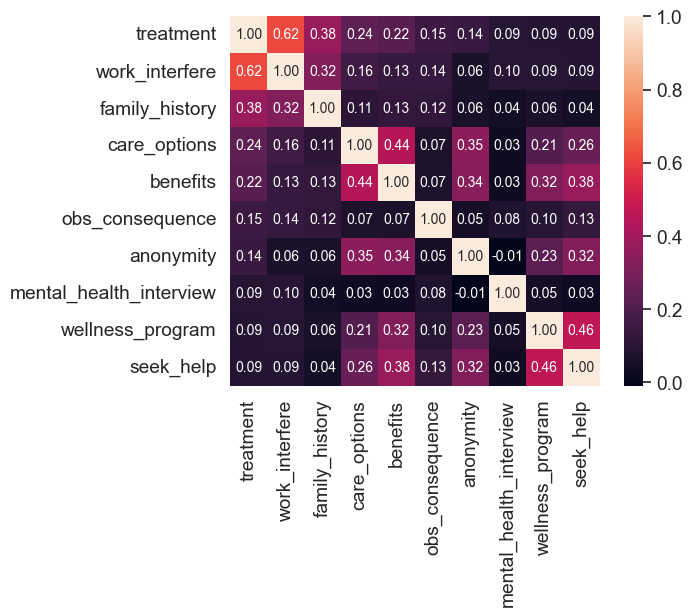

In [19]:
#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#Some charts to see data relationship

**Distribution** and density by Age

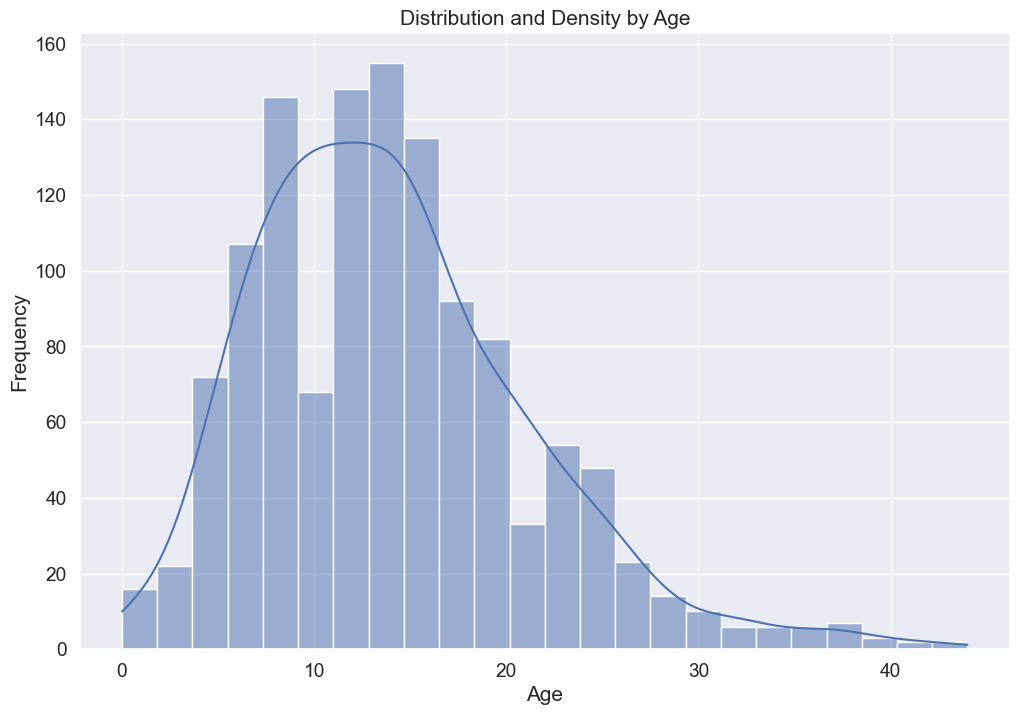

In [20]:
# # Distribution and density by Age
# plt.figure(figsize=(12,8))
# sns.distplot(train_df["Age"], bins=24)
# plt.title("Distribution and density by Age")
# plt.xlabel("Age")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.histplot(train_df["Age"], bins=24, kde=True)  # kde=True adds a density curve
plt.title("Distribution and Density by Age")
plt.xlabel("Age")
plt.ylabel("Frequency")  # Optional label
plt.show()


Separate by treatment

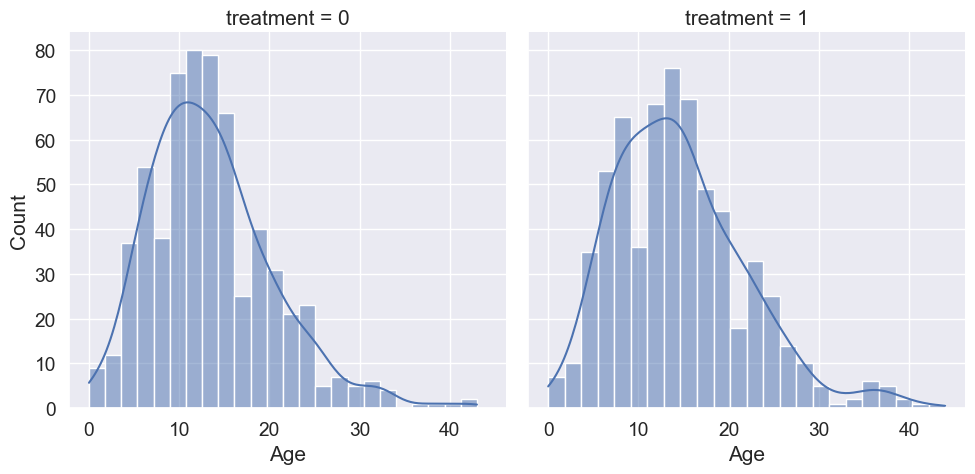

In [21]:

g = sns.FacetGrid(train_df, col="treatment", height=5)  # Use height instead of size
g.map(sns.histplot, "Age", bins=24, kde=True)  # Use histplot instead of distplot

plt.show()


How many people has been treated?

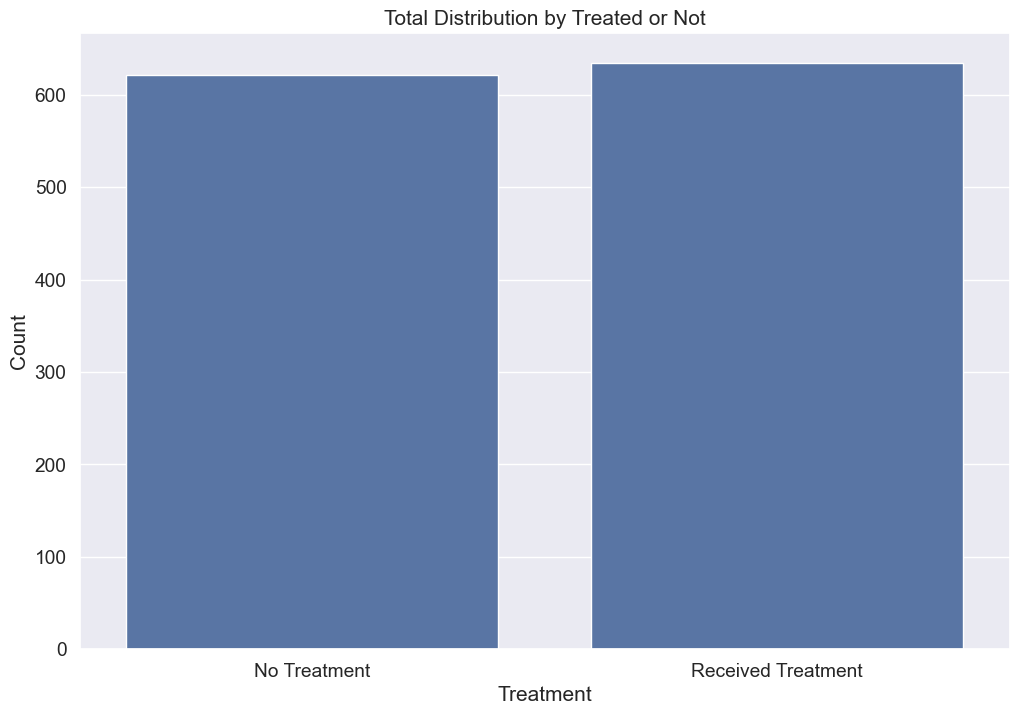

In [22]:
# plt.figure(figsize=(12,8))
# labels = labelDict['label_Gender']
# g = sns.countplot(x="treatment", data=train_df)
# g.set_xticklabels(labels)

# plt.title('Total Distribution by treated or not')


plt.figure(figsize=(12,8))

# Plot countplot
g = sns.countplot(x="treatment", data=train_df)

# Set tick labels safely
g.set_xticks(range(len(g.get_xticks())))  # Ensure fixed tick positions
g.set_xticklabels(["No Treatment", "Received Treatment"])  # Use correct labels

plt.title("Total Distribution by Treated or Not")
plt.xlabel("Treatment")
plt.ylabel("Count")
plt.show()


Nested barplot to show probabilities for class and sex

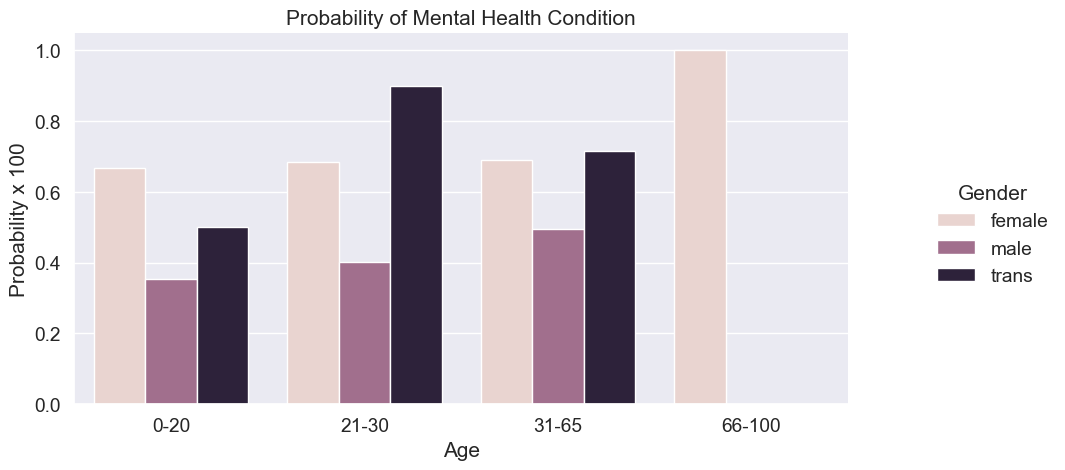

In [23]:
# o = labelDict['label_age_range']

# g = sns.factorplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar",  ci=None, size=5, aspect=2, legend_out = True)
# g.set_xticklabels(o)

# plt.title('Probability of mental health condition')
# plt.ylabel('Probability x 100')
# plt.xlabel('Age')
# # replace legend labels

# new_labels = labelDict['label_Gender']
# for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# # Positioning the legend
# g.fig.subplots_adjust(top=0.9,right=0.8)

# plt.show()



o = labelDict['label_age_range']

# Use `catplot()` with `errorbar=None`
g = sns.catplot(x="age_range", y="treatment", hue="Gender", data=train_df, 
                kind="bar", errorbar=None, height=5, aspect=2, legend_out=True)  # Use errorbar=None

# Set x-tick labels
g.set_xticklabels(o)

plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):  
    t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()



Barplot to show probabilities for family history

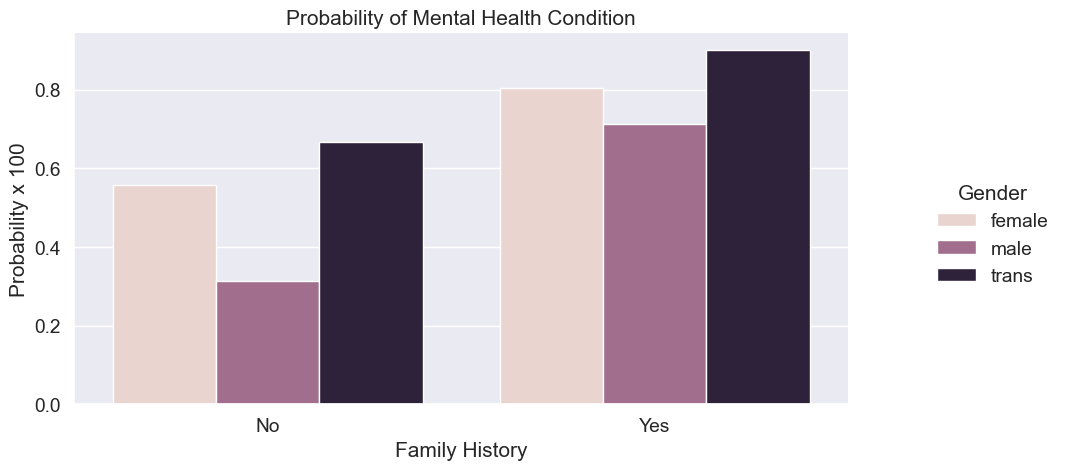

In [24]:
# o = labelDict['label_family_history']
# g = sns.factorplot(x="family_history", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
# g.set_xticklabels(o)
# plt.title('Probability of mental health condition')
# plt.ylabel('Probability x 100')
# plt.xlabel('Family History')

# # replace legend labels
# new_labels = labelDict['label_Gender']
# for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# # Positioning the legend
# g.fig.subplots_adjust(top=0.9,right=0.8)

# plt.show()



o = labelDict['label_family_history']

# Use `catplot()` instead of `factorplot()`
g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=train_df, 
                kind="bar", errorbar=None, height=5, aspect=2, legend_out=True)  # Use height instead of size

# Set x-tick labels
g.set_xticklabels(o)

plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):  
    t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


Care Options
The following are some of the most common types of care options for individuals 

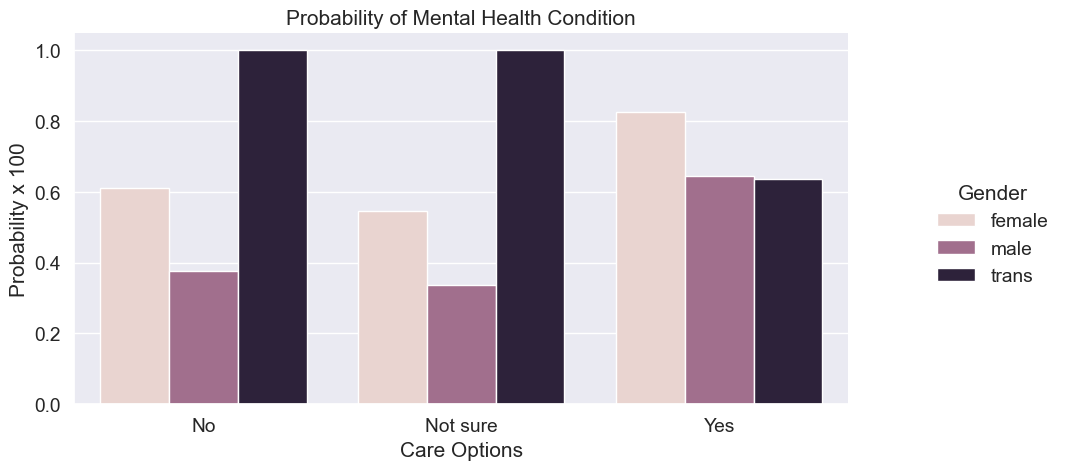

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

o = labelDict['label_care_options']

# Use `catplot()` instead of `factorplot()`
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, 
                kind="bar", errorbar=None, height=5, aspect=2, legend_out=True)  # Use height instead of size

# Set x-tick labels
g.set_xticklabels(o)

plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care Options')

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):  
    t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


Barplot to show probabilities for benefits



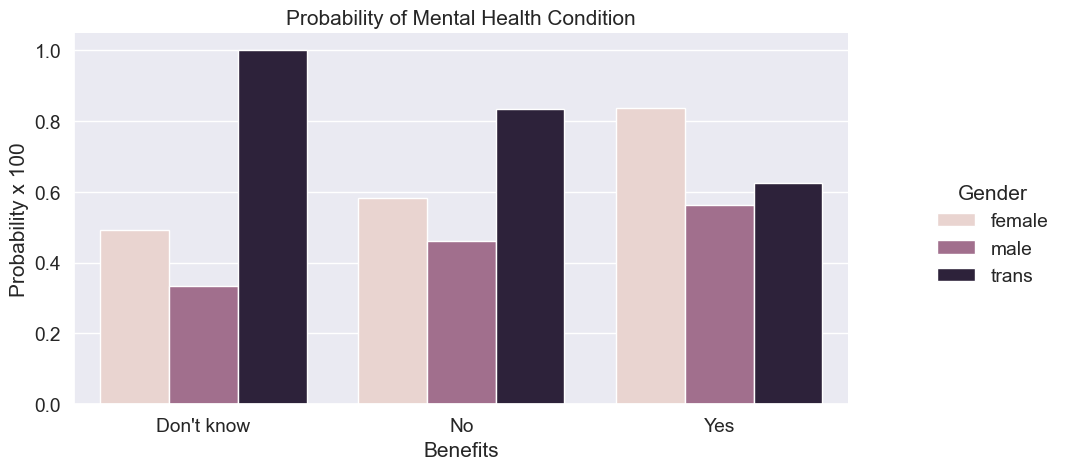

In [26]:
# o = labelDict['label_benefits']
# g = sns.factorplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
# g.set_xticklabels(o)
# plt.title('Probability of mental health condition')
# plt.ylabel('Probability x 100')
# plt.xlabel('Benefits')

# # replace legend labels
# new_labels = labelDict['label_Gender']
# for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# # Positioning the legend
# g.fig.subplots_adjust(top=0.9,right=0.8)
# plt.show()



o = labelDict['label_benefits']

# Use `catplot()` instead of `factorplot()`
g = sns.catplot(x="benefits", y="treatment", hue="Gender", data=train_df, 
                kind="bar", errorbar=None, height=5, aspect=2, legend_out=True)  # Use height instead of size

# Set x-tick labels
g.set_xticklabels(o)

plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):  
    t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


Barplot to show probabilities for work interfere



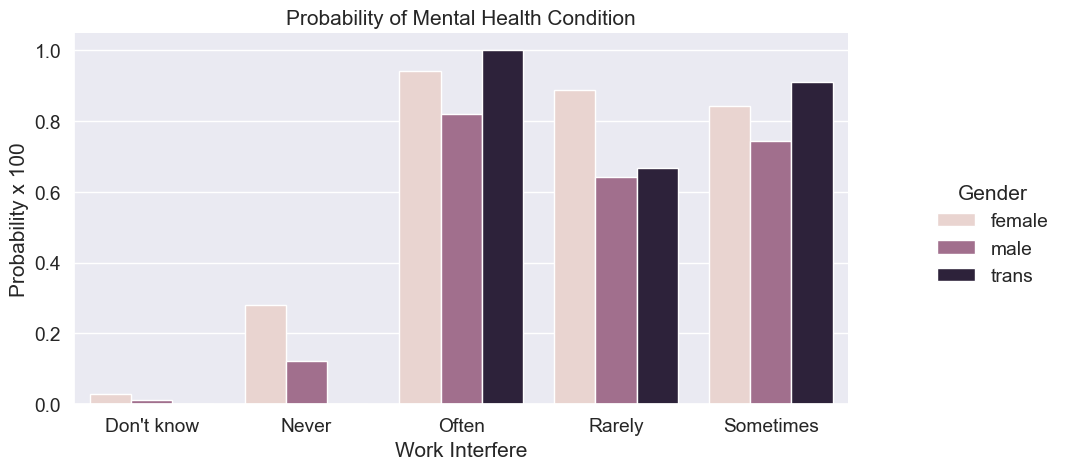

In [27]:
# o = labelDict['label_work_interfere']
# g = sns.factorplot(x="work_interfere", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
# g.set_xticklabels(o)
# plt.title('Probability of mental health condition')
# plt.ylabel('Probability x 100')
# plt.xlabel('Work interfere')

# # replace legend labels
# new_labels = labelDict['label_Gender']
# for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# # Positioning the legend
# g.fig.subplots_adjust(top=0.9,right=0.8)
# plt.show()


o = labelDict['label_work_interfere']

# Use `catplot()` instead of `factorplot()`
g = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=train_df, 
                kind="bar", errorbar=None, height=5, aspect=2, legend_out=True)  # Use height instead of size

# Set x-tick labels
g.set_xticklabels(o)

plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work Interfere')

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):  
    t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


#Scaling and Fitting

Features Scaling We're going to scale age, because is extremely different from the othere ones.



In [28]:
# Scaling Age
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


 Model Training Part 

Spilitting Dataset

Test size:-30% 
Train size:-70%

In [29]:
# define X and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = train_df[feature_cols]
y = train_df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

#printing x_train, xtest and y train and ytest
print(X_train)
print(X_test)
print(y_train)
print(y_test)

print(f"Total number of record in training dataset :{X_train.shape[0]}")
print(f"Total number of record in testing dataset :{X_test.shape[0]}")

           Age  Gender  family_history  benefits  care_options  anonymity  \
929   0.295455       1               1         0             0          0   
901   0.568182       1               1         1             0          0   
579   0.363636       1               1         2             0          0   
367   0.409091       1               1         1             2          2   
615   0.272727       1               0         1             1          0   
...        ...     ...             ...       ...           ...        ...   
763   0.454545       1               1         1             0          1   
835   0.590909       1               1         0             0          0   
1218  0.227273       1               0         1             1          0   
559   0.136364       1               0         0             1          0   
684   0.068182       0               0         1             0          0   

      leave  work_interfere  
929       4               1  
901       3    

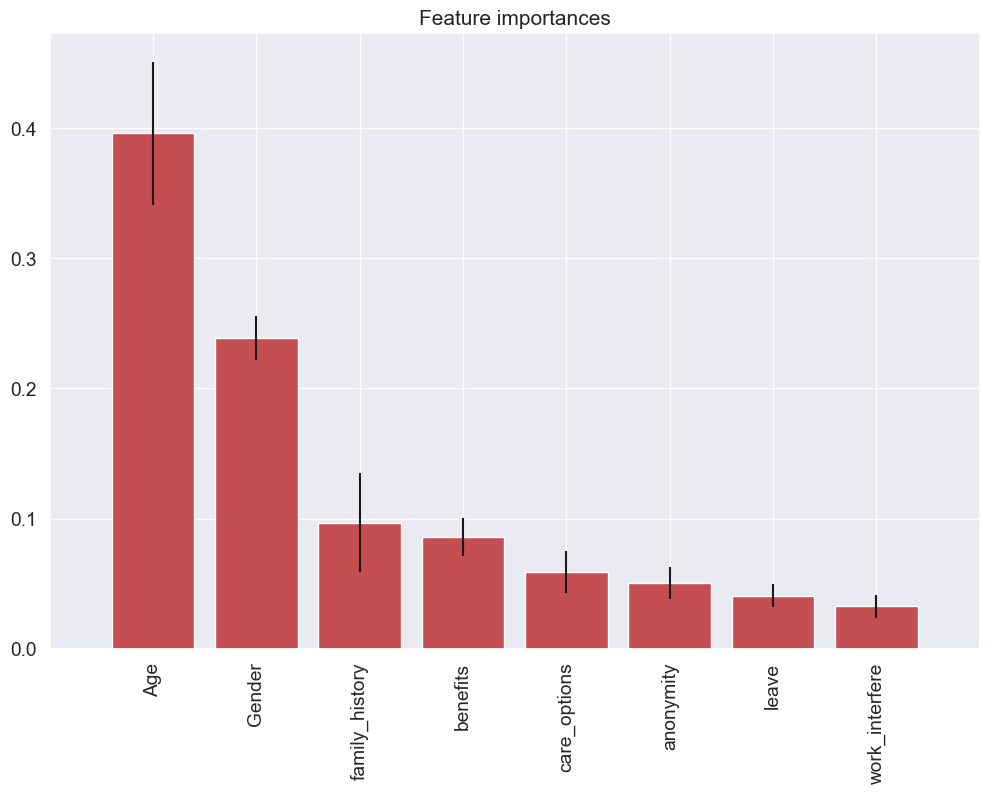

In [30]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])      
    
# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

#Tuning  Evaluation of the model

In [31]:
from sklearn.preprocessing import binarize
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())
    
    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())
    
    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    
    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    
    ##########################################
    #Adjusting the classification threshold
    ##########################################
    # print the first 10 predicted responses
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]
    
    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    if plot == True:
        # histogram of predicted probabilities
        plt.rcParams['font.size'] = 12
        plt.hist(y_pred_prob, bins=8)
        
        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    
    
    # predict treatment if the predicted probability is greater than 0.3
    # it will return 1 for all values above 0.3 and 0 otherwise
    # results are 2D so we slice out the first column
    # Fix binarize() issue
    y_pred_prob = y_pred_prob.reshape(-1, 1)  # Ensure correct shape
    y_pred_class = binarize(y_pred_prob, threshold=0.3)[:, 0]  # 
    
    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
    
    ##########################################
    #ROC Curves and Area Under the Curve (AUC)
    ##########################################
    
    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
    

    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    
    # define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    
    
    
    return metrics.accuracy_score(y_test, y_pred_class) 

# evalClassModel

Tuning with cross validation score

In [32]:
def tuningCV(knn):
    
    # search for an optimal value of K for KNN
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

Tuning with GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV


def tuningGridSerach(knn):
    #More efficient parameter tuning using GridSearchCV
    k_range = list(range(1, 31))
    print(k_range)
    
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)
    
    # instantiate the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # fit the grid with data
    grid.fit(X, y)
    
    # view the complete results (list of named tuples)
    grid.grid_scores_
    
    # examine the first tuple
    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)
    
    # create a list of the mean scores only
    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)
    
    # plot the results
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
    
    # examine the best model
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)

Tuning with RandomizedSearchCV

In [34]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.cv_results_
    
    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

Tuning with searching multiple parameters simultaneously

In [35]:
def tuningMultParam(knn):
    
    #Searching multiple parameters simultaneously
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
        
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print(param_grid) 
    
    # instantiate and fit the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y) 
    
    # view the complete results
    print(grid.grid_scores_)
    
    # examine the best model
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)

#Evaluating models

Logistic Regression

In [36]:
# def logisticRegression():
#     # train a logistic regression model on the training set
#     logreg = LogisticRegression()
#     logreg.fit(X_train, y_train)
    
#     # make class predictions for the testing set
#     y_pred_class = logreg.predict(X_test)
    
#     accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)
    
#     #Data for final graph
#     methodDict['Log. Regression'] = accuracy_score * 100

    
# logisticRegression()


In [37]:
def logisticRegression():
    # Train a logistic regression model on the training set
    global logreg  # Make model accessible for prediction
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    # Make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)

    # Evaluate the model
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)

    # Store accuracy
    methodDict['Log. Regression'] = accuracy_score * 100




Accuracy: 0.7936507936507936
Null accuracy:
 treatment
0    191
1    187
Name: count, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


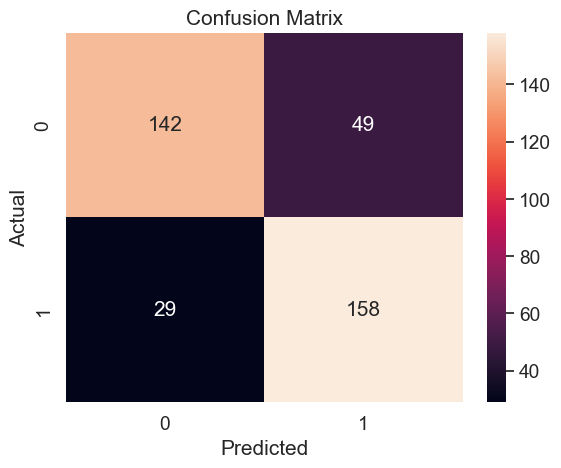

Classification Accuracy: 0.7936507936507936
Classification Error: 0.2063492063492064
False Positive Rate: 0.25654450261780104
Precision: 0.7632850241545893
AUC Score: 0.794187641739228
Cross-validated AUC: 0.8753371866593114
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 0 1]
First 10 predicted probabilities of class members:
 [[0.09192784 0.90807216]
 [0.95998457 0.04001543]
 [0.96552072 0.03447928]
 [0.78739197 0.21260803]
 [0.38947126 0.61052874]
 [0.05256967 0.94743033]
 [0.75023269 0.24976731]
 [0.19037376 0.80962624]
 [0.61623206 0.38376794]
 [0.4769296  0.5230704 ]]
First 10 predicted probabilities:
 [[0.90807216]
 [0.04001543]
 [0.03447928]
 [0.21260803]
 [0.61052874]
 [0.94743033]
 [0.24976731]
 [0.80962624]
 [0.38376794]
 [0.5230704 ]]


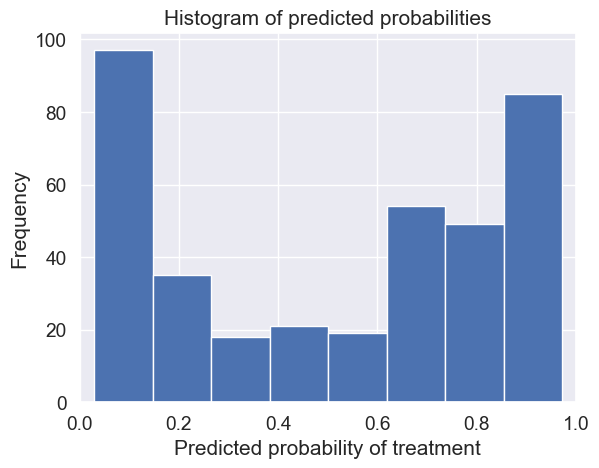

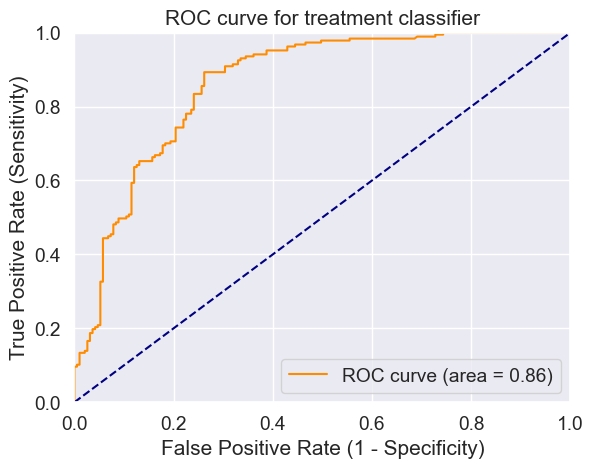

[[142  49]
 [ 29 158]]


In [38]:
logisticRegression()

In [39]:
import pandas as pd
import numpy as np

def predictLogisticRegression(new_data):
    """
    Predict whether a person needs mental health treatment and show confidence percentage.

    :param new_data: List of feature values [Age, Gender, family_history, benefits, care_options, anonymity, leave, work_interfere]
    :return: Predicted class with confidence percentage
    """
    if 'logreg' not in globals():
        print("Model not trained. Please run logisticRegression() first.")
        return None

    # Convert input to a DataFrame with proper column names
    feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
    new_data_df = pd.DataFrame([new_data], columns=feature_cols)

    # Predict class and get probability
    prediction = logreg.predict(new_data_df)[0]
    prediction_prob = logreg.predict_proba(new_data_df)[0]  # Probabilities for [No Treatment, Needs Treatment]

    # Get confidence percentage
    confidence = prediction_prob[prediction] * 100

    # Print the result
    result = "Needs Treatment" if prediction == 1 else "No Treatment"
    print(f"Prediction: {result} (Confidence: {confidence:.2f}%)")

    return result, confidence


# Example: Predicting for a new user
new_user = [25, 1, 0, 1, 2, 0, 1, 3]  # Replace with actual user input
predictLogisticRegression(new_user)


Prediction: Needs Treatment (Confidence: 100.00%)


('Needs Treatment', 99.99997380748648)

KNeighbors Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier

def Knn():
    """
    Train a K-Nearest Neighbors (KNN) model and evaluate its performance.
    """
    global knn  # Make it accessible for prediction
    knn = KNeighborsClassifier(n_neighbors=5)

    # Define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    
    # Specify "parameter distributions" rather than a "parameter grid"
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    tuningRandomizedSearchCV(knn, param_dist)

    # Train the best KNN model
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)

    # Make predictions on test data
    y_pred_class = knn.predict(X_test)

    # Evaluate model performance
    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)

    # Store accuracy in dictionary
    methodDict['K-Neighbors'] = accuracy_score * 100


Rand. Best Score:  0.8217650793650794
Rand. Best Params:  {'weights': 'uniform', 'n_neighbors': 27}
[0.822, 0.815, 0.817, 0.815, 0.822, 0.819, 0.822, 0.817, 0.819, 0.822, 0.822, 0.822, 0.817, 0.816, 0.819, 0.817, 0.816, 0.822, 0.822, 0.822]
Accuracy: 0.8042328042328042
Null accuracy:
 treatment
0    191
1    187
Name: count, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


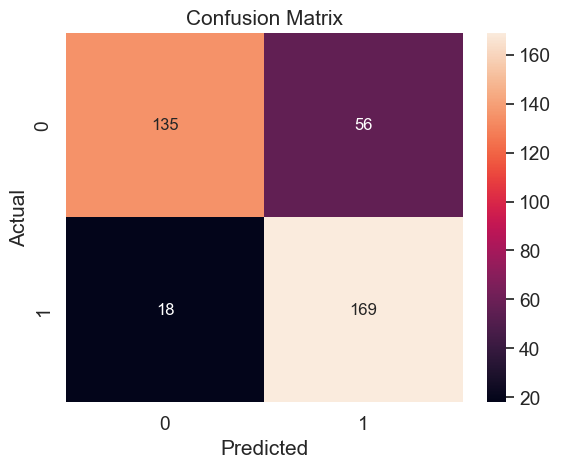

Classification Accuracy: 0.8042328042328042
Classification Error: 0.1957671957671958
False Positive Rate: 0.2931937172774869
Precision: 0.7511111111111111
AUC Score: 0.8052747991152673
Cross-validated AUC: 0.8784644661702792
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.33333333 0.66666667]
 [1.         0.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.37037037 0.62962963]
 [0.03703704 0.96296296]
 [0.59259259 0.40740741]
 [0.37037037 0.62962963]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]]
First 10 predicted probabilities:
 [[0.66666667]
 [0.        ]
 [0.        ]
 [0.33333333]
 [0.62962963]
 [0.96296296]
 [0.40740741]
 [0.62962963]
 [0.66666667]
 [0.66666667]]


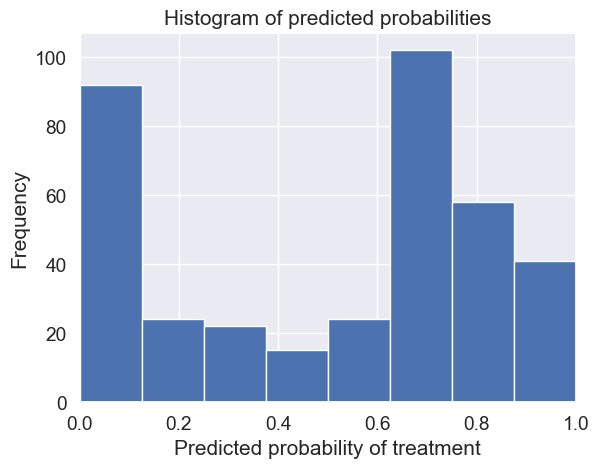

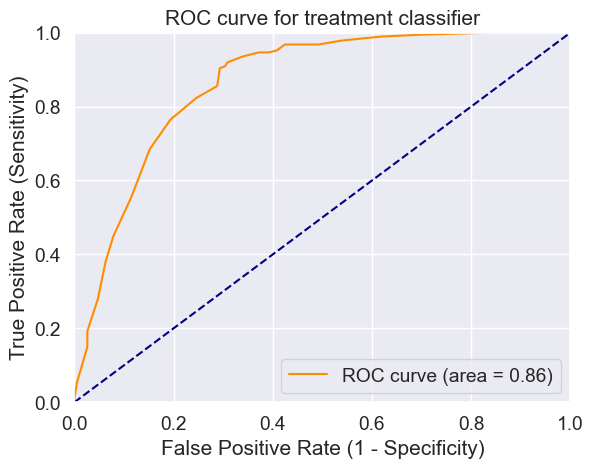

[[135  56]
 [ 18 169]]


In [41]:
Knn()

In [42]:
import pandas as pd
import numpy as np
from sklearn.exceptions import NotFittedError

def predictKNN(new_data):
    """
    Predict whether a person needs mental health treatment using the trained KNN model.

    :param new_data: List of feature values [Age, Gender, family_history, benefits, care_options, anonymity, leave, work_interfere]
    :return: Predicted class with confidence percentage
    """
    global knn  # Ensure we're using the trained model

    if 'knn' not in globals():
        print("🚨 KNN model is not trained. Please run Knn() first.")
        return None

    try:
        # Convert input to a DataFrame with proper column names
        feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
        new_data_df = pd.DataFrame([new_data], columns=feature_cols)

        # Predict class and get probability (if available)
        prediction = knn.predict(new_data_df)[0]

        if hasattr(knn, "predict_proba"):
            prediction_prob = knn.predict_proba(new_data_df)[0]
            confidence = prediction_prob[prediction] * 100
        else:
            confidence = "N/A"  # Some KNN models may not support probability estimation

        # Print the result
        result = "Needs Mental Health Treatment" if prediction == 1 else "No Treatment"
        print(f"[KNN] Prediction: {result} (Confidence: {confidence}%)")

        return result, confidence

    except NotFittedError:
        print("🚨 KNN model is not trained yet! Please run Knn() before prediction.")
        return None


Rand. Best Score:  0.8217650793650794
Rand. Best Params:  {'weights': 'uniform', 'n_neighbors': 27}
[0.817, 0.81, 0.814, 0.817, 0.813, 0.819, 0.822, 0.822, 0.822, 0.822, 0.816, 0.822, 0.822, 0.812, 0.819, 0.813, 0.822, 0.822, 0.822, 0.81]
Accuracy: 0.8042328042328042
Null accuracy:
 treatment
0    191
1    187
Name: count, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


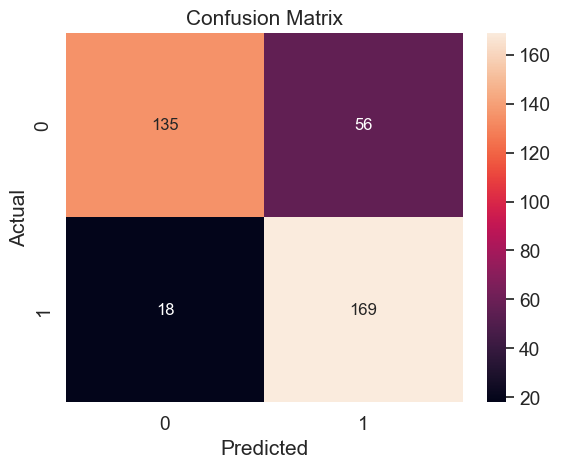

Classification Accuracy: 0.8042328042328042
Classification Error: 0.1957671957671958
False Positive Rate: 0.2931937172774869
Precision: 0.7511111111111111
AUC Score: 0.8052747991152673
Cross-validated AUC: 0.8784644661702792
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.33333333 0.66666667]
 [1.         0.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.37037037 0.62962963]
 [0.03703704 0.96296296]
 [0.59259259 0.40740741]
 [0.37037037 0.62962963]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]]
First 10 predicted probabilities:
 [[0.66666667]
 [0.        ]
 [0.        ]
 [0.33333333]
 [0.62962963]
 [0.96296296]
 [0.40740741]
 [0.62962963]
 [0.66666667]
 [0.66666667]]


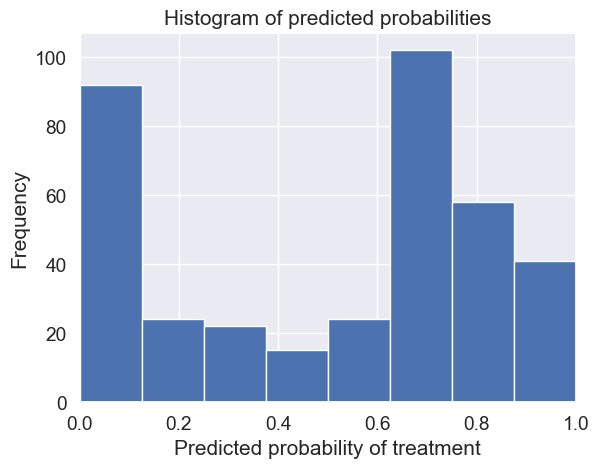

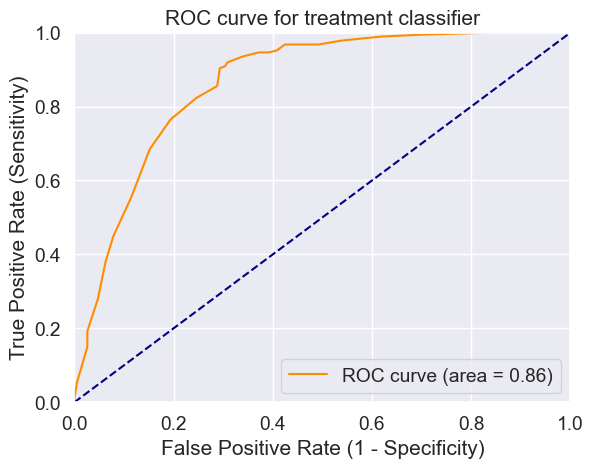

[[135  56]
 [ 18 169]]
[KNN] Prediction: Needs Mental Health Treatment (Confidence: 77.77777777777779%)


('Needs Mental Health Treatment', 77.77777777777779)

In [43]:
# Step 1: Train KNN
Knn()

# Step 2: Predict for a new user
new_user = [25, 1, 0, 1, 2, 0, 1, 3]  # Example user input
predictKNN(new_user)


Decision Tree classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

def treeClassifier():
    """
    Train a Decision Tree Classifier and evaluate its performance.
    """
    global tree  # Make the model accessible for predictions
    tree = DecisionTreeClassifier()

    # Define hyperparameters for tuning
    featuresSize = len(feature_cols)
    param_dist = {
        "max_depth": [3, None],
        "max_features": randint(1, featuresSize),
        "min_samples_split": randint(2, 9),
        "min_samples_leaf": randint(1, 9),
        "criterion": ["gini", "entropy"]
    }
    tuningRandomizedSearchCV(tree, param_dist)  # Optimize model

    # Train the Decision Tree with optimized parameters
    tree = DecisionTreeClassifier(
        max_depth=3, min_samples_split=8, max_features=6, 
        criterion='entropy', min_samples_leaf=7
    )
    tree.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_class = tree.predict(X_test)

    # Evaluate model performance
    accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)

    # Store accuracy for visualization
    methodDict['Decision Tree Classifier'] = accuracy_score * 100
    print("🌳 ✅ Decision Tree Model Trained Successfully!\n")


In [45]:
import pandas as pd
from termcolor import colored  # To add colors in the terminal

def predictDecisionTree(new_data):
    """
    Predict whether a person needs mental health treatment using the trained Decision Tree model.

    :param new_data: List of feature values [Age, Gender, family_history, benefits, care_options, anonymity, leave, work_interfere]
    :return: Predicted class with confidence percentage
    """
    if 'tree' not in globals():
        print(colored("🚨 Decision Tree model is not trained. Please run treeClassifier() first.", "red"))
        return None

    try:
        # Convert input to DataFrame with column names
        feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
        new_data_df = pd.DataFrame([new_data], columns=feature_cols)

        # Predict class
        prediction = tree.predict(new_data_df)[0]

        # DecisionTreeClassifier does not always support probability estimation
        if hasattr(tree, "predict_proba"):
            prediction_prob = tree.predict_proba(new_data_df)[0]
            confidence = prediction_prob[prediction] * 100
        else:
            confidence = "N/A"

        # Format the result with colors and emojis
        if prediction == 1:
            result_text = colored("🚨 Needs Mental Health Treatment", "red", attrs=["bold"])
        else:
            result_text = colored("✅ No Treatment Required", "green", attrs=["bold"])

        # Print the final prediction
        print(f"🌳 [Decision Tree] Prediction: {result_text} (Confidence: {confidence}%)\n")

        return result_text, confidence

    except Exception as e:
        print(colored(f"⚠️ Error: {e}", "yellow"))
        return None


Rand. Best Score:  0.8305206349206349
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 8}
[0.83, 0.831, 0.831, 0.829, 0.826, 0.831, 0.831, 0.829, 0.83, 0.831, 0.827, 0.831, 0.831, 0.831, 0.831, 0.83, 0.815, 0.831, 0.831, 0.831]
Accuracy: 0.8068783068783069
Null accuracy:
 treatment
0    191
1    187
Name: count, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


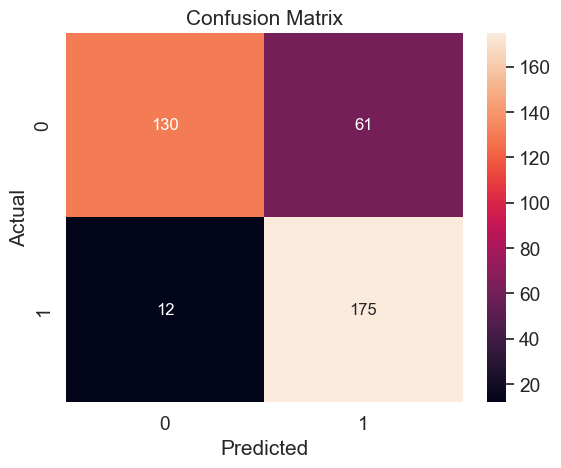

Classification Accuracy: 0.8068783068783069
Classification Error: 0.19312169312169314
False Positive Rate: 0.3193717277486911
Precision: 0.7415254237288136
AUC Score: 0.8082285746283282
Cross-validated AUC: 0.8868389672177115
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.18823529 0.81176471]
 [0.97959184 0.02040816]
 [1.         0.        ]
 [0.8778626  0.1221374 ]
 [0.36969697 0.63030303]
 [0.05172414 0.94827586]
 [0.8778626  0.1221374 ]
 [0.36969697 0.63030303]
 [0.20430108 0.79569892]
 [0.20430108 0.79569892]]
First 10 predicted probabilities:
 [[0.81176471]
 [0.02040816]
 [0.        ]
 [0.1221374 ]
 [0.63030303]
 [0.94827586]
 [0.1221374 ]
 [0.63030303]
 [0.79569892]
 [0.79569892]]


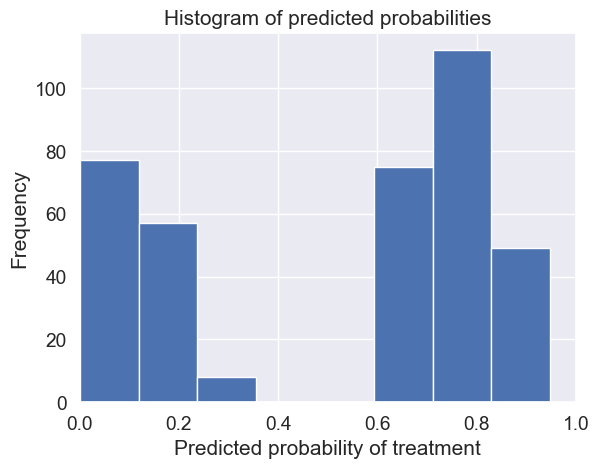

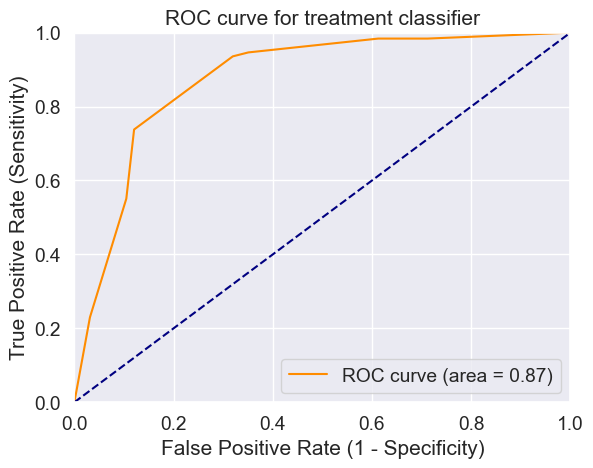

[[130  61]
 [ 12 175]]
🌳 ✅ Decision Tree Model Trained Successfully!

🌳 [Decision Tree] Prediction: 🚨 Needs Mental Health Treatment (Confidence: 63.030303030303024%)



('\x1b\x1b🚨 Needs Mental Health Treatment\x1b', 63.030303030303024)

In [46]:
# Train the Decision Tree model
treeClassifier()

# Example: Predict for a new user
new_user = [25, 1, 0, 1, 2, 0, 1, 3]  # Replace with actual user input
predictDecisionTree(new_user)


Random Forests

In [47]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

def randomForest():
    """
    Train a Random Forest Classifier and evaluate its performance.
    """
    global forest  # Ensure the model is accessible for prediction
    forest = RandomForestClassifier(n_estimators=20)

    # Define hyperparameters for tuning
    featuresSize = len(feature_cols)
    param_dist = {
        "max_depth": [3, None],
        "max_features": randint(1, featuresSize),
        "min_samples_split": randint(2, 9),
        "min_samples_leaf": randint(1, 9),
        "criterion": ["gini", "entropy"]
    }
    tuningRandomizedSearchCV(forest, param_dist)  # Optimize model

    # Train the Random Forest with optimized parameters
    forest = RandomForestClassifier(
        max_depth=None, min_samples_leaf=8, min_samples_split=2,
        n_estimators=20, random_state=1
    )
    forest.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_class = forest.predict(X_test)

    # Evaluate model performance
    accuracy_score = evalClassModel(forest, y_test, y_pred_class, True)

    # Store accuracy for visualization
    methodDict['Random Forest'] = accuracy_score * 100
    print("🌲 ✅ Random Forest Model Trained Successfully!\n")


In [48]:
import pandas as pd
from termcolor import colored  # To add colors in the terminal

def predictRandomForest(new_data):
    """
    Predict whether a person needs mental health treatment using the trained Random Forest model.

    :param new_data: List of feature values [Age, Gender, family_history, benefits, care_options, anonymity, leave, work_interfere]
    :return: Predicted class with confidence percentage
    """
    if 'forest' not in globals():
        print(colored("🚨 Random Forest model is not trained. Please run randomForest() first.", "red"))
        return None

    try:
        # Convert input to DataFrame with column names
        feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
        new_data_df = pd.DataFrame([new_data], columns=feature_cols)

        # Predict class
        prediction = forest.predict(new_data_df)[0]

        # Get probability if available
        if hasattr(forest, "predict_proba"):
            prediction_prob = forest.predict_proba(new_data_df)[0]
            confidence = prediction_prob[prediction] * 100
        else:
            confidence = "N/A"

        # Format the result with colors and emojis
        if prediction == 1:
            result_text = colored("🚨 Needs Mental Health Treatment", "red", attrs=["bold"])
        else:
            result_text = colored("✅ No Treatment Required", "green", attrs=["bold"])

        # Print the final prediction
        print(f"🌲 [Random Forest] Prediction: {result_text} (Confidence: {confidence}%)\n")

        return result_text, confidence

    except Exception as e:
        print(colored(f"⚠️ Error: {e}", "yellow"))
        return None


Rand. Best Score:  0.8305206349206349
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 8}
[0.831, 0.831, 0.833, 0.831, 0.834, 0.834, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.832, 0.833, 0.828, 0.835, 0.831, 0.831, 0.831, 0.831]
Accuracy: 0.8121693121693122
Null accuracy:
 treatment
0    191
1    187
Name: count, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


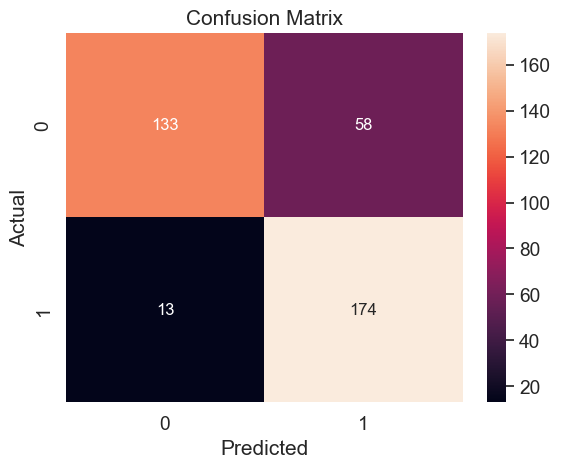

Classification Accuracy: 0.8121693121693122
Classification Error: 0.1878306878306878
False Positive Rate: 0.3036649214659686
Precision: 0.75
AUC Score: 0.8134081809782457
Cross-validated AUC: 0.8934280651104528
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.2555794  0.7444206 ]
 [0.95069083 0.04930917]
 [0.93851009 0.06148991]
 [0.87096597 0.12903403]
 [0.40653554 0.59346446]
 [0.17282958 0.82717042]
 [0.89450448 0.10549552]
 [0.4065912  0.5934088 ]
 [0.20540631 0.79459369]
 [0.19337644 0.80662356]]
First 10 predicted probabilities:
 [[0.7444206 ]
 [0.04930917]
 [0.06148991]
 [0.12903403]
 [0.59346446]
 [0.82717042]
 [0.10549552]
 [0.5934088 ]
 [0.79459369]
 [0.80662356]]


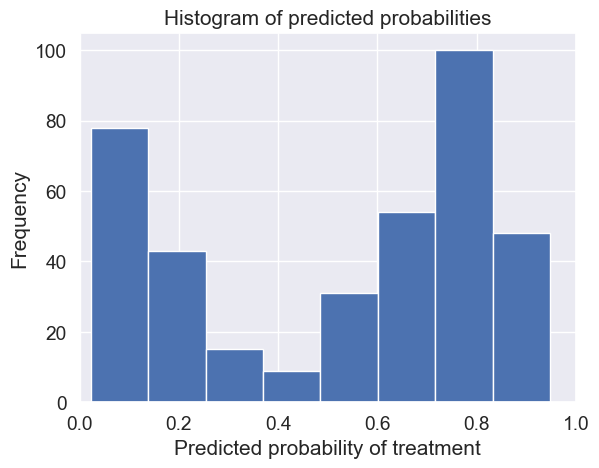

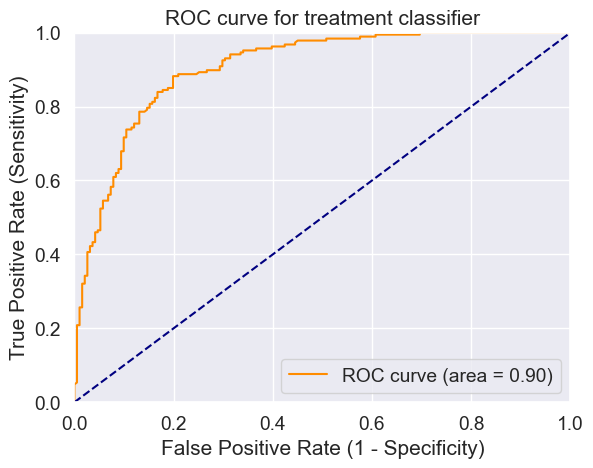

[[133  58]
 [ 13 174]]
🌲 ✅ Random Forest Model Trained Successfully!

🌲 [Random Forest] Prediction: 🚨 Needs Mental Health Treatment (Confidence: 71.88564386845015%)



('\x1b\x1b🚨 Needs Mental Health Treatment\x1b', 71.88564386845015)

In [49]:
# Train the Random Forest model
randomForest()

# Example: Predict for a new user
new_user = [25, 1, 0, 1, 2, 0, 1, 3]  # Replace with actual user input
predictRandomForest(new_user)


Bagging

In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

def bagging():
    """
    Train a Bagging Classifier with Decision Trees and evaluate its performance.
    """
    global bag  # Ensure model is accessible for prediction
    bag = BaggingClassifier(
        estimator=DecisionTreeClassifier(),  # 
        max_samples=1.0, max_features=1.0,
        bootstrap_features=False
    )

    # Train the Bagging model
    bag.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_class = bag.predict(X_test)

    # Evaluate model performance
    accuracy_score = evalClassModel(bag, y_test, y_pred_class, True)

    # Store accuracy for visualization
    methodDict['Bagging'] = accuracy_score * 100
    print("👜 ✅ Bagging Classifier Trained Successfully!\n")


In [51]:
import pandas as pd
from termcolor import colored  # To add colors in the terminal

def predictBagging(new_data):
    """
    Predict whether a person needs mental health treatment using the trained Bagging model.

    :param new_data: List of feature values [Age, Gender, family_history, benefits, care_options, anonymity, leave, work_interfere]
    :return: Predicted class with confidence percentage
    """
    if 'bag' not in globals():
        print(colored("🚨 Bagging model is not trained. Please run bagging() first.", "red"))
        return None

    try:
        # Convert input to DataFrame with column names
        feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
        new_data_df = pd.DataFrame([new_data], columns=feature_cols)

        # Predict class
        prediction = bag.predict(new_data_df)[0]

        # Get probability if available
        if hasattr(bag, "predict_proba"):
            prediction_prob = bag.predict_proba(new_data_df)[0]
            confidence = prediction_prob[prediction] * 100
        else:
            confidence = "N/A"

        # Format the result with colors and emojis
        if prediction == 1:
            result_text = colored("🚨 Needs Mental Health Treatment", "red", attrs=["bold"])
        else:
            result_text = colored("✅ No Treatment Required", "green", attrs=["bold"])

        # Print the final prediction
        print(f"👜 [Bagging] Prediction: {result_text} (Confidence: {confidence}%)\n")

        return result_text, confidence

    except Exception as e:
        print(colored(f"⚠️ Error: {e}", "yellow"))
        return None


Accuracy: 0.7804232804232805
Null accuracy:
 treatment
0    191
1    187
Name: count, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0]


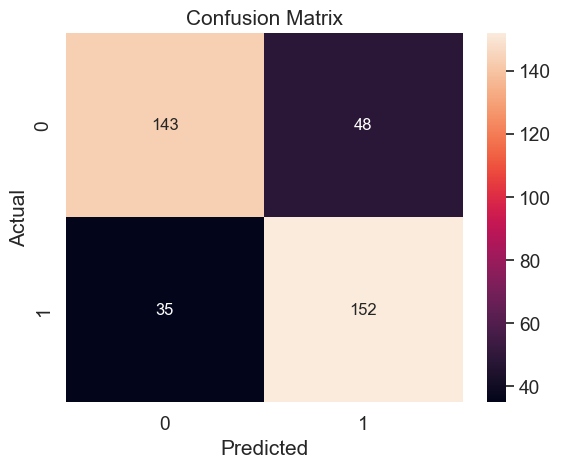

Classification Accuracy: 0.7804232804232805
Classification Error: 0.21957671957671954
False Positive Rate: 0.2513089005235602
Precision: 0.76
AUC Score: 0.7807626620376852
Cross-validated AUC: 0.8552969421789026
First 10 predicted responses:
 [1 0 0 0 0 1 0 0 1 1]
First 10 predicted probabilities of class members:
 [[0.13333333 0.86666667]
 [1.         0.        ]
 [1.         0.        ]
 [0.8        0.2       ]
 [0.8        0.2       ]
 [0.3        0.7       ]
 [0.6        0.4       ]
 [0.7        0.3       ]
 [0.1        0.9       ]
 [0.         1.        ]]
First 10 predicted probabilities:
 [[0.86666667]
 [0.        ]
 [0.        ]
 [0.2       ]
 [0.2       ]
 [0.7       ]
 [0.4       ]
 [0.3       ]
 [0.9       ]
 [1.        ]]


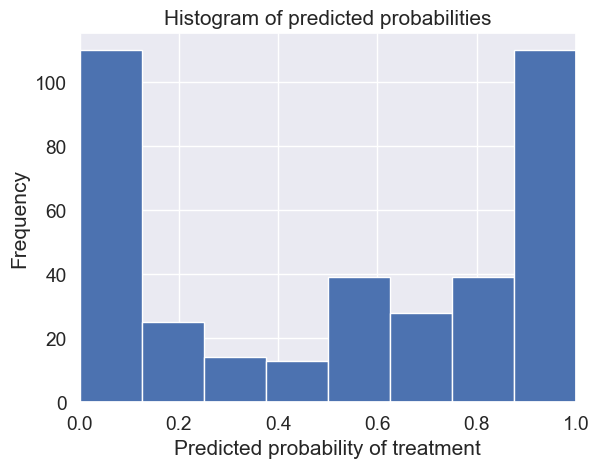

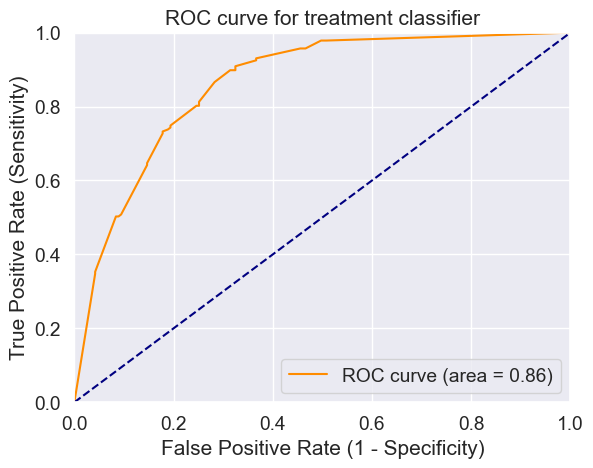

[[143  48]
 [ 35 152]]
👜 ✅ Bagging Classifier Trained Successfully!

👜 [Bagging] Prediction: 🚨 Needs Mental Health Treatment (Confidence: 90.0%)



('\x1b\x1b🚨 Needs Mental Health Treatment\x1b', 90.0)

In [52]:
# Train the Bagging Classifier
bagging()

# Example: Predict for a new user
new_user = [25, 1, 0, 1, 2, 0, 1, 3]  # Replace with actual user input
predictBagging(new_user)


Boosting

In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

def boosting():
    """
    Train an AdaBoost Classifier with Decision Trees and evaluate its performance.
    """
    global boost  # Ensure model is accessible for prediction
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)

    # AdaBoost with `algorithm="SAMME"` for better compatibility
    boost = AdaBoostClassifier(estimator=clf, n_estimators=500, algorithm="SAMME")  

    # Train the model
    boost.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_class = boost.predict(X_test)

    # Evaluate model performance
    accuracy_score = evalClassModel(boost, y_test, y_pred_class, True)

    # Store accuracy for visualization
    methodDict['Boosting'] = accuracy_score * 100
    print("⚡ ✅ Boosting (AdaBoost) Classifier Trained Successfully!\n")


In [54]:
import pandas as pd
from termcolor import colored  # To add colors in the terminal

def predictBoosting(new_data):
    """
    Predict whether a person needs mental health treatment using the trained Boosting (AdaBoost) model.

    :param new_data: List of feature values [Age, Gender, family_history, benefits, care_options, anonymity, leave, work_interfere]
    :return: Predicted class with confidence percentage
    """
    if 'boost' not in globals():
        print(colored("🚨 Boosting model is not trained. Please run boosting() first.", "red"))
        return None

    try:
        # Convert input to DataFrame with column names
        feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
        new_data_df = pd.DataFrame([new_data], columns=feature_cols)

        # Predict class
        prediction = boost.predict(new_data_df)[0]

        # Get probability if available
        if hasattr(boost, "predict_proba"):
            prediction_prob = boost.predict_proba(new_data_df)[0]
            confidence = prediction_prob[prediction] * 100
        else:
            confidence = "N/A"

        # Format the result with colors and emojis
        if prediction == 1:
            result_text = colored("🚨 Needs Mental Health Treatment", "red", attrs=["bold"])
        else:
            result_text = colored("✅ No Treatment Required", "green", attrs=["bold"])

        # Print the final prediction
        print(f"⚡ [Boosting] Prediction: {result_text} (Confidence: {confidence}%)\n")

        return result_text, confidence

    except Exception as e:
        print(colored(f"⚠️ Error: {e}", "yellow"))
        return None


Accuracy: 0.8095238095238095
Null accuracy:
 treatment
0    191
1    187
Name: count, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


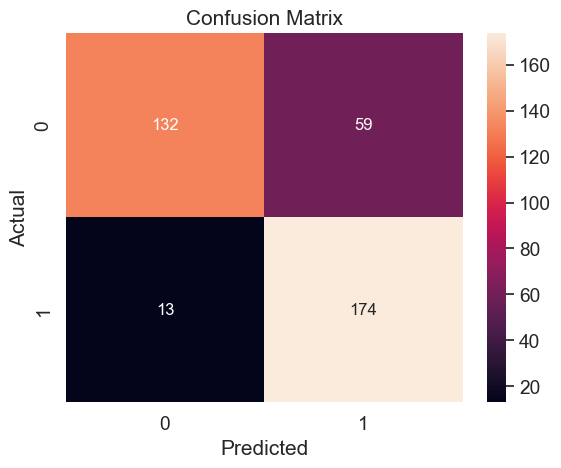

Classification Accuracy: 0.8095238095238095
Classification Error: 0.19047619047619047
False Positive Rate: 0.3089005235602094
Precision: 0.7467811158798283
AUC Score: 0.8107903799311253
Cross-validated AUC: 0.896802760456034
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.43487785 0.56512215]
 [0.7396404  0.2603596 ]
 [0.73829669 0.26170331]
 [0.5921301  0.4078699 ]
 [0.49341802 0.50658198]
 [0.37337578 0.62662422]
 [0.5591953  0.4408047 ]
 [0.46083991 0.53916009]
 [0.43395372 0.56604628]
 [0.40128902 0.59871098]]
First 10 predicted probabilities:
 [[0.56512215]
 [0.2603596 ]
 [0.26170331]
 [0.4078699 ]
 [0.50658198]
 [0.62662422]
 [0.4408047 ]
 [0.53916009]
 [0.56604628]
 [0.59871098]]


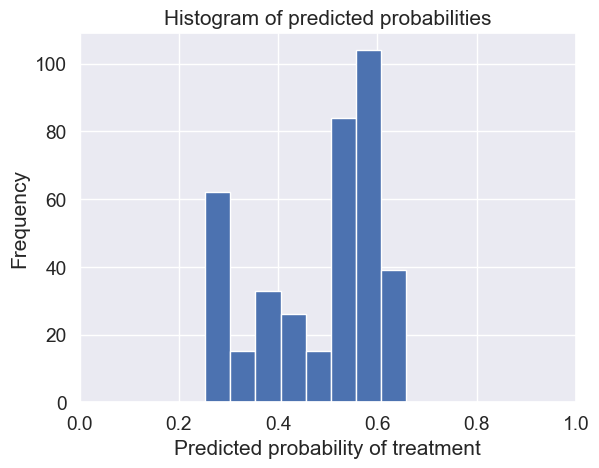

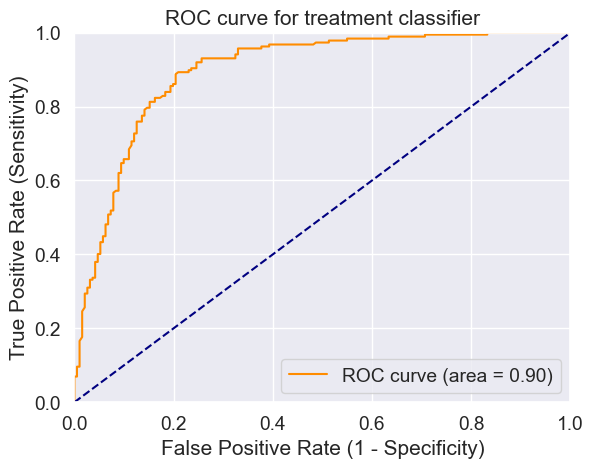

[[132  59]
 [ 13 174]]
⚡ ✅ Boosting (AdaBoost) Classifier Trained Successfully!

⚡ [Boosting] Prediction: 🚨 Needs Mental Health Treatment (Confidence: 60.32417051580694%)



('\x1b\x1b🚨 Needs Mental Health Treatment\x1b', 60.32417051580694)

In [55]:
# Train the Boosting Classifier
boosting()

# Example: Predict for a new user
new_user = [25, 1, 0, 1, 2, 0, 1, 3]  # Replace with actual user input
predictBoosting(new_user)


Stacking

In [56]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

def stacking():
    """
    Train a Stacking Classifier with multiple models and evaluate its performance.
    """
    global stack  # Ensure model is accessible for prediction

    # Base models
    clf1 = KNeighborsClassifier(n_neighbors=1)
    clf2 = RandomForestClassifier(random_state=1)
    clf3 = GaussianNB()
    
    # Meta-classifier (final decision maker)
    lr = LogisticRegression()

    # Stacking Classifier (Fix: Use `estimators` instead of `classifiers`)
    stack = StackingClassifier(
        estimators=[('knn', clf1), ('rf', clf2), ('nb', clf3)],  # ✅ FIXED
        final_estimator=lr
    )

    # Train the Stacking model
    stack.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_class = stack.predict(X_test)

    # Evaluate model performance
    accuracy_score = evalClassModel(stack, y_test, y_pred_class, True)

    # Store accuracy for visualization
    methodDict['Stacking'] = accuracy_score * 100
    print("🔗 ✅ Stacking Classifier Trained Successfully!\n")


In [57]:
import pandas as pd
from termcolor import colored  # To add colors in the terminal

def predictStacking(new_data):
    """
    Predict whether a person needs mental health treatment using the trained Stacking model.

    :param new_data: List of feature values [Age, Gender, family_history, benefits, care_options, anonymity, leave, work_interfere]
    :return: Predicted class with confidence percentage
    """
    if 'stack' not in globals():
        print(colored("🚨 Stacking model is not trained. Please run stacking() first.", "red"))
        return None

    try:
        # Convert input to DataFrame with column names
        feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
        new_data_df = pd.DataFrame([new_data], columns=feature_cols)

        # Predict class
        prediction = stack.predict(new_data_df)[0]

        # Get probability if available
        if hasattr(stack, "predict_proba"):
            prediction_prob = stack.predict_proba(new_data_df)[0]
            confidence = prediction_prob[prediction] * 100
        else:
            confidence = "N/A"

        # Format the result with colors and emojis
        if prediction == 1:
            result_text = colored("🚨 Needs Mental Health Treatment", "red", attrs=["bold"])
        else:
            result_text = colored("✅ No Treatment Required", "green", attrs=["bold"])

        # Print the final prediction
        print(f"🔗 [Stacking] Prediction: {result_text} (Confidence: {confidence}%)\n")

        return result_text, confidence

    except Exception as e:
        print(colored(f"⚠️ Error: {e}", "yellow"))
        return None


Accuracy: 0.8201058201058201
Null accuracy:
 treatment
0    191
1    187
Name: count, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


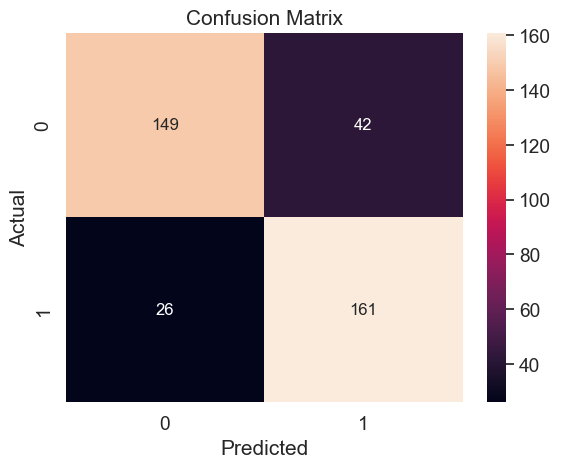

Classification Accuracy: 0.8201058201058201
Classification Error: 0.17989417989417988
False Positive Rate: 0.2198952879581152
Precision: 0.7931034482758621
AUC Score: 0.8205336394434022
Cross-validated AUC: 0.8891313710744153
First 10 predicted responses:
 [1 0 0 0 0 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.17216465 0.82783535]
 [0.92320141 0.07679859]
 [0.92323668 0.07676332]
 [0.84576961 0.15423039]
 [0.71849375 0.28150625]
 [0.12916627 0.87083373]
 [0.87733428 0.12266572]
 [0.32591088 0.67408912]
 [0.37990769 0.62009231]
 [0.20535565 0.79464435]]
First 10 predicted probabilities:
 [[0.82783535]
 [0.07679859]
 [0.07676332]
 [0.15423039]
 [0.28150625]
 [0.87083373]
 [0.12266572]
 [0.67408912]
 [0.62009231]
 [0.79464435]]


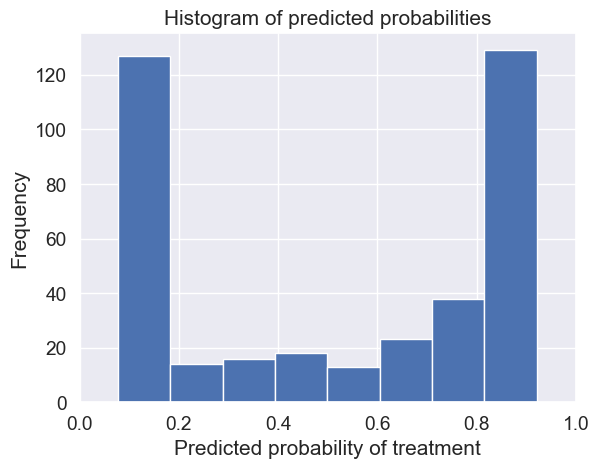

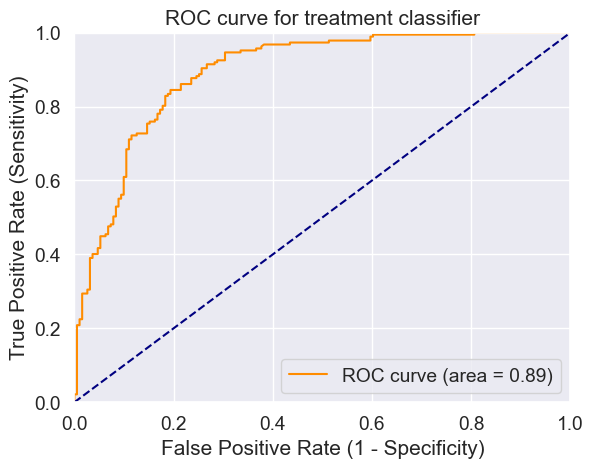

[[149  42]
 [ 26 161]]
🔗 ✅ Stacking Classifier Trained Successfully!

🔗 [Stacking] Prediction: 🚨 Needs Mental Health Treatment (Confidence: 84.50438976275954%)



('\x1b\x1b🚨 Needs Mental Health Treatment\x1b', 84.50438976275954)

In [58]:
# Train the Stacking Classifier
stacking()

# Example: Predict for a new user
new_user = [25, 1, 0, 1, 2, 0, 1, 3]  # Replace with actual user input
predictStacking(new_user)


#Predicting with Neural Network

Create input function

In [59]:
# %tensorflow_version 1.x
import tensorflow as tf
import argparse

In [60]:
print(tf.__version__)

2.16.2


In [61]:
batch_size = 100
train_steps = 1000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

def train_input_fn(features, labels, batch_size):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle, repeat, and batch the examples.
    return dataset.shuffle(1000).repeat().batch(batch_size)

def eval_input_fn(features, labels, batch_size):
    """An input function for evaluation or prediction"""
    features=dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)

    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    # Batch the examples
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    # Return the dataset.
    return dataset

Define the feature columns

In [62]:
import tensorflow as tf
import numpy as np

# Define Keras preprocessing layers
age = tf.keras.layers.Normalization(axis=-1)
gender = tf.keras.layers.Normalization(axis=-1)
family_history = tf.keras.layers.Normalization(axis=-1)
benefits = tf.keras.layers.Normalization(axis=-1)
care_options = tf.keras.layers.Normalization(axis=-1)
anonymity = tf.keras.layers.Normalization(axis=-1)
leave = tf.keras.layers.Normalization(axis=-1)
work_interfere = tf.keras.layers.Normalization(axis=-1)

# Store the preprocessing layers in a list
feature_columns = [age, gender, family_history, benefits, care_options, anonymity, leave, work_interfere]

# Convert Pandas Series to NumPy array before adapting
age.adapt(np.array(X_train["Age"]).reshape(-1, 1))
gender.adapt(np.array(X_train["Gender"]).reshape(-1, 1))
family_history.adapt(np.array(X_train["family_history"]).reshape(-1, 1))
benefits.adapt(np.array(X_train["benefits"]).reshape(-1, 1))
care_options.adapt(np.array(X_train["care_options"]).reshape(-1, 1))
anonymity.adapt(np.array(X_train["anonymity"]).reshape(-1, 1))
leave.adapt(np.array(X_train["leave"]).reshape(-1, 1))
work_interfere.adapt(np.array(X_train["work_interfere"]).reshape(-1, 1))


Instantiate an Estimator

In [63]:
# import tensorflow as tf

# Build a Deep Neural Network (DNN) using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),  # Hidden Layer 1
    tf.keras.layers.Dense(10, activation='relu'),  # Hidden Layer 2
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output Layer for Binary Classification
])

# Compile the model using Keras Adagrad Optimizer
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Train the model

In [64]:
# model.train(input_fn=lambda:train_input_fn(X_train, y_train, batch_size), steps=train_steps)

# Train the model using `model.fit()` instead of `model.train()`
model.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_data=(X_test, y_test))


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.5949 - loss: 0.6750 - val_accuracy: 0.6984 - val_loss: 0.6083
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7688 - loss: 0.5649 - val_accuracy: 0.7698 - val_loss: 0.5567
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8003 - loss: 0.5302 - val_accuracy: 0.7910 - val_loss: 0.5230
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8271 - loss: 0.4874 - val_accuracy: 0.7804 - val_loss: 0.5008
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8436 - loss: 0.4433 - val_accuracy: 0.7884 - val_loss: 0.4864
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8358 - loss: 0.4223 - val_accuracy: 0.7725 - val_loss: 0.4757
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8273 - loss: 0.4238 - val_accuracy: 0.7937 - val_loss: 0.4609
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8184 - loss: 0.4378 - val_accuracy: 0.7884 - val_loss: 0.4541
Ep

Evaluate the model

In [65]:
# Evaluate the model
eval_result = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

# Extract accuracy (second element of the tuple)
accuracy = eval_result[1] * 100  

# Store the accuracy in methodDict
# methodDict['Neural Network'] = accuracy

# Correct print statement
print(f'\nTest set accuracy: {accuracy:.2f}%\n')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7844 - loss: 0.4567

Test set accuracy: 79.10%



Making predictions (inferring) from the trained model

In [66]:
# Make predictions using model.predict() (without input_fn)
predictions = model.predict(X_train, batch_size=batch_size)

# Convert predictions to a list (optional)
predictions = predictions.tolist()

# Print first 10 predictions
print(predictions[:10])


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[0.2483769804239273], [0.7619085311889648], [0.8593217134475708], [0.8028932809829712], [0.4241522550582886], [0.9189881086349487], [0.6769644618034363], [0.9166784882545471], [0.16217821836471558], [0.8881274461746216]]


In [67]:
import numpy as np
import pandas as pd

# Dictionary for predictions
col1 = []
col2 = []
col3 = []

# Loop through predictions
for idx, expected, p in zip(X_train.index, y_train, predictions):
    class_id = np.argmax(p)  # Get the index of the highest probability class
    probability = p[class_id]  # Get probability of the predicted class

    # Adding to dataframe
    col1.append(idx)  # Index
    col2.append(class_id)  # Predicted Class
    col3.append(expected)  # Expected Class

# Create results DataFrame
results = pd.DataFrame({'index': col1, 'prediction': col2, 'expected': col3})
results.head()


,index,prediction,expected
0,929,0,0
1,901,0,1
2,579,0,1
3,367,0,1
4,615,0,1


#Success method plot

In [68]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar') 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([70.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')
     
    plt.show()

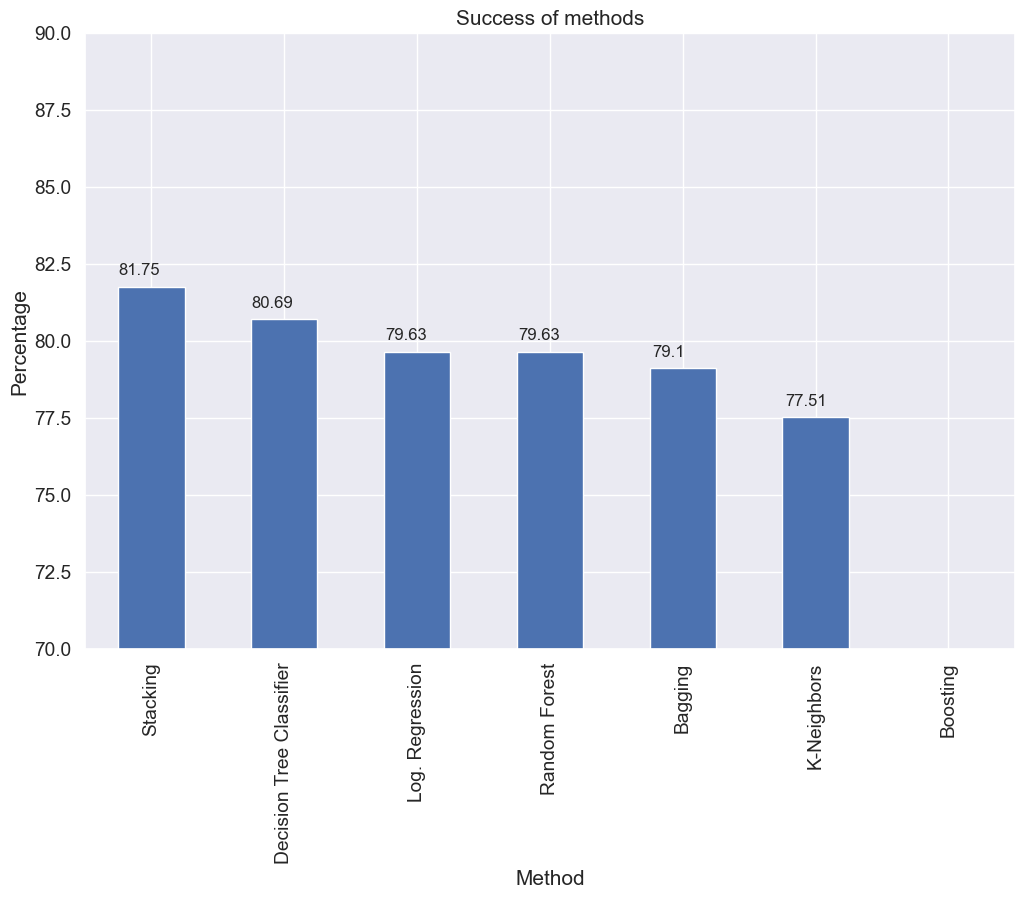

In [69]:
plotSuccess()

#Creating predictions on test set

In [70]:
# Generate predictions with the best method
clf = AdaBoostClassifier()
clf.fit(X, y)
dfTestPredictions = clf.predict(X_test)

# Write predictions to csv file
# We don't have any significative field so we save the index
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
# Save to file
# This file will be visible after publishing in the output section
results.to_csv('results.csv', index=False)
results.head()

C:\Users\Atharva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Index,Treatment
0,5,1
1,494,0
2,52,0
3,984,0
4,186,0


#Submission

In [71]:
# We don't have any significative field so we save the index
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
results

,Index,Treatment
0,5,1
1,494,0
2,52,0
3,984,0
4,186,0
...,...,...
373,1084,1
374,506,0
375,1142,0
376,1124,0


In [72]:
print(results.columns)  # Check available column names
print(results.head())  # Preview first few rows


Index(['Index', 'Treatment'], dtype='object')
   Index  Treatment
0      5          1
1    494          0
2     52          0
3    984          0
4    186          0


In [73]:
# Save the model in the new recommended Keras format
model.save("mental_health_model.keras")


In [74]:
# used to store encoders

import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# Load the dataset (Ensure it is the same dataset used for training)
df = pd.read_csv("survey.csv")  # Change the filename if needed

# Define categorical columns that were encoded
categorical_cols = ['Gender', 'family_history', 'benefits', 'care_options', 
                    'anonymity', 'leave', 'work_interfere']

# Create a dictionary to store LabelEncoders
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Apply encoding to the dataset
    encoders[col] = le  # Store encoder

# Save the encoders
joblib.dump(encoders, "label_encoders.pkl")
print("✅ `label_encoders.pkl` has been created successfully!")


✅ `label_encoders.pkl` has been created successfully!


In [75]:
import pandas as pd

# Load the dataset
df = pd.read_csv("survey.csv")

# Check class distribution
print(df['treatment'].value_counts(normalize=True) * 100)




treatment
Yes    50.595711
No     49.404289
Name: proportion, dtype: float64


In [76]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("mental_health_model.keras")



In [77]:
model

<Sequential name=sequential, built=True>

In [78]:
import numpy as np

# created model based prediction

# Prepare new input data (same preprocessing as training)
new_data = np.array([[0.25, 0, 0, 0, 0, 0, 2, 3]])  # Example dont need mental heath treatment
# new_data = np.array([[0.7, 1, 1, 1, 1, 1, 3, 3]])  



# Convert new_data to TensorFlow Tensor
new_data_tensor = tf.convert_to_tensor(new_data, dtype=tf.float32)

# Make prediction using the trained model
predictions = model.predict(new_data_tensor)

# Extract the predicted class and probability
predicted_class = np.argmax(predictions, axis=1)[0]  # Get class with highest probability
probability = np.max(predictions)  # Get highest probability

if probability > 0.7:
    predicted_class = 1
else:
    predicted_class = 0

# Output the prediction result
if predicted_class == 1:
    print(f"✅ The person needs mental health treatment. (Confidence: {probability:.2f})")
else:
    print(f"❌ The person does NOT need mental health treatment. (Confidence: {probability:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
❌ The person does NOT need mental health treatment. (Confidence: 0.59)


GENERIC PREDICTION MODEL


In [79]:
from termcolor import colored

def predictModel(model, new_data, model_name="Model"):
    """
    Predict whether a person needs mental health treatment using the trained model.
    
    :param model: Trained machine learning model
    :param new_data: List of feature values [Age, Gender, family_history, benefits, care_options, anonymity, leave, work_interfere]
    :param model_name: Name of the model for display
    :return: Predicted class with confidence percentage
    """
    if model is None:
        print(colored(f"🚨 {model_name} is not trained yet. Train the model first!", "red"))
        return None

    try:
        # Convert input to DataFrame with column names
        feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
        new_data_df = pd.DataFrame([new_data], columns=feature_cols)

        # Predict class
        prediction = model.predict(new_data_df)[0]

        # Get probability if available
        if hasattr(model, "predict_proba"):
            prediction_prob = model.predict_proba(new_data_df)[0]
            confidence = prediction_prob[prediction] * 100
        else:
            confidence = "N/A"

        # Format the result with colors and emojis
        if prediction == 1:
            result_text = colored("🚨 Needs Mental Health Treatment", "red", attrs=["bold"])
        else:
            result_text = colored("✅ No Treatment Required", "green", attrs=["bold"])

        # Print the final prediction with better formatting
        print(colored("=" * 50, "cyan"))
        print(colored(f"📌 Model: {model_name}", "yellow", attrs=["bold"]))
        print(f"🔍 Prediction: {result_text}")
        print(f"🎯 Confidence: {confidence:.2f}%")
        print(colored("=" * 50, "cyan"), "\n")

        return result_text, confidence

    except Exception as e:
        print(colored(f"⚠️ Error in {model_name}: {e}", "yellow"))
        return None


In [80]:
# Example user input
new_user = [10, 1, 0, 1, 2, 0, 3, 3]  # Replace with actual user input

# Predict with different models
predictModel(logreg, new_user, "Logistic Regression")
predictModel(knn, new_user, "K-Nearest Neighbors")
predictModel(tree, new_user, "Decision Tree")
predictModel(forest, new_user, "Random Forest")
predictModel(clf, new_user, "AdaBoost")
predictModel(stack, new_user, "Stacking Classifier")

print("HERE Confidence is the ")


📌 Model: Logistic Regression
🔍 Prediction: 🚨 Needs Mental Health Treatment
🎯 Confidence: 99.78%

📌 Model: K-Nearest Neighbors
🔍 Prediction: 🚨 Needs Mental Health Treatment
🎯 Confidence: 81.48%

📌 Model: Decision Tree
🔍 Prediction: 🚨 Needs Mental Health Treatment
🎯 Confidence: 63.03%

📌 Model: Random Forest
🔍 Prediction: 🚨 Needs Mental Health Treatment
🎯 Confidence: 65.60%

📌 Model: AdaBoost
🔍 Prediction: 🚨 Needs Mental Health Treatment
🎯 Confidence: 60.26%

📌 Model: Stacking Classifier
🔍 Prediction: 🚨 Needs Mental Health Treatment
🎯 Confidence: 72.35%

HERE Confidence is the 


In [81]:
# dynamic user input import difflib

import difflib


def get_user_input():
    """
    Take structured user input, auto-correct typos, and return the processed data.
    
    Returns:
        list: Processed feature values in correct format.
    """

    print(colored("\n📝 Please provide the following details for mental health prediction:", "cyan", attrs=["bold"]))

    # Define expected values and their mappings
    gender_map = {"male": 1, "female": 0, "other": 2}
    history_map = {"yes": 1, "no": 0}
    benefits_map = {"yes": 1, "no": 0}
    care_options_map = {"no": 0, "not sure": 1, "yes": 2}
    anonymity_map = {"no": 0, "not sure": 1, "yes": 2}
    leave_map = {"somewhat easy": 0, "very easy": 1, "somewhat difficult": 2, "very difficult": 3}
    work_interfere_map = {"never": 0, "rarely": 1, "sometimes": 2, "often": 3}

    # Helper function for typo correction
    def correct_input(user_input, valid_options):
        match = difflib.get_close_matches(user_input.lower(), valid_options.keys(), n=1, cutoff=0.6)
        return match[0] if match else None

    # Ask for user input and validate
    while True:
        try:
            age = int(input(colored("📌 Enter Age (Valid range: 16-100): ", "yellow")).strip())
            if 16 <= age <= 100:
                break
            else:
                print(colored("🚨 Please enter a valid age between 16 and 100.", "red"))
        except ValueError:
            print(colored("🚨 Invalid input! Please enter a number.", "red"))

    while True:
        gender = input(colored("📌 Enter Gender (Male/Female/Other): ", "yellow")).strip().lower()
        corrected_gender = correct_input(gender, gender_map)
        if corrected_gender:
            gender = gender_map[corrected_gender]
            break
        else:
            print(colored("🚨 Invalid input! Please enter Male, Female, or Other.", "red"))

    while True:
        family_history = input(colored("📌 Do you have a family history of mental illness? (Yes/No): ", "yellow")).strip().lower()
        corrected_history = correct_input(family_history, history_map)
        if corrected_history:
            family_history = history_map[corrected_history]
            break
        else:
            print(colored("🚨 Please enter Yes or No.", "red"))

    while True:
        benefits = input(colored("📌 Does your employer provide mental health benefits? (Yes/No): ", "yellow")).strip().lower()
        corrected_benefits = correct_input(benefits, benefits_map)
        if corrected_benefits:
            benefits = benefits_map[corrected_benefits]
            break
        else:
            print(colored("🚨 Please enter Yes or No.", "red"))

    while True:
        care_options = input(colored("📌 Are mental health care options available to you? (No/Not Sure/Yes): ", "yellow")).strip().lower()
        corrected_care = correct_input(care_options, care_options_map)
        if corrected_care:
            care_options = care_options_map[corrected_care]
            break
        else:
            print(colored("🚨 Please enter No, Not Sure, or Yes.", "red"))

    while True:
        anonymity = input(colored("📌 Is anonymity protected in your workplace? (No/Not Sure/Yes): ", "yellow")).strip().lower()
        corrected_anonymity = correct_input(anonymity, anonymity_map)
        if corrected_anonymity:
            anonymity = anonymity_map[corrected_anonymity]
            break
        else:
            print(colored("🚨 Please enter No, Not Sure, or Yes.", "red"))

    while True:
        leave = input(colored("📌 How easy is it to take mental health leave? (Somewhat Easy/Very Easy/Somewhat Difficult/Very Difficult): ", "yellow")).strip().lower()
        corrected_leave = correct_input(leave, leave_map)
        if corrected_leave:
            leave = leave_map[corrected_leave]
            break
        else:
            print(colored("🚨 Invalid response! Please enter one of the valid options.", "red"))

    while True:
        work_interfere = input(colored("📌 How often does mental health interfere with work? (Never/Rarely/Sometimes/Often): ", "yellow")).strip().lower()
        corrected_interfere = correct_input(work_interfere, work_interfere_map)
        if corrected_interfere:
            work_interfere = work_interfere_map[corrected_interfere]
            break
        else:
            print(colored("🚨 Invalid response! Please enter one of the valid options.", "red"))

    # Return the processed user input
    return [age, gender, family_history, benefits, care_options, anonymity, leave, work_interfere]



In [82]:
# Get user input dynamically
new_user = get_user_input()

# Predict using different models
predictModel(logreg, new_user, "Logistic Regression")
predictModel(knn, new_user, "K-Nearest Neighbors")
predictModel(tree, new_user, "Decision Tree")
predictModel(forest, new_user, "Random Forest")
predictModel(clf, new_user, "AdaBoost")
predictModel(stack, new_user, "Stacking Classifier")



📝 Please provide the following details for mental health prediction:
📌 Model: Logistic Regression
🔍 Prediction: 🚨 Needs Mental Health Treatment
🎯 Confidence: 99.93%

📌 Model: K-Nearest Neighbors
🔍 Prediction: ✅ No Treatment Required
🎯 Confidence: 85.19%

📌 Model: Decision Tree
🔍 Prediction: ✅ No Treatment Required
🎯 Confidence: 100.00%

📌 Model: Random Forest
🔍 Prediction: ✅ No Treatment Required
🎯 Confidence: 89.80%

📌 Model: AdaBoost
🔍 Prediction: 🚨 Needs Mental Health Treatment
🎯 Confidence: 57.68%

📌 Model: Stacking Classifier
🔍 Prediction: 🚨 Needs Mental Health Treatment
🎯 Confidence: 56.69%



('\x1b\x1b🚨 Needs Mental Health Treatment\x1b', 56.690839027068854)

In [83]:
# z test for the above models 
import numpy as np
import scipy.stats as stats

# Sample Data
model_accuracies = np.array([85, 78, 92, 88, 79, 83])  # Example accuracies of ML models
baseline_accuracy = 50  # Random guessing (null hypothesis)
sample_mean = np.mean(model_accuracies)  # Mean accuracy of ML models
sample_std = np.std(model_accuracies, ddof=1)  # Standard deviation of sample
n = len(model_accuracies)  # Sample size

# Compute Z-score
z_score = (sample_mean - baseline_accuracy) / (sample_std / np.sqrt(n))

# Compute p-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Display Results
print(f"📌 Z-Score: {z_score:.2f}")
print(f"📌 P-Value: {p_value:.5f}")

# Decision Rule
alpha = 0.05  # Significance level
if p_value < alpha:
    print("✅ Reject the Null Hypothesis: The ML model performs significantly better than random guessing.")
else:
    print("❌ Fail to Reject the Null Hypothesis: No significant difference detected.")


📌 Z-Score: 15.66
📌 P-Value: 0.00000
✅ Reject the Null Hypothesis: The ML model performs significantly better than random guessing.
